In [76]:
def preprocessing(features, test_features):
    
    number_train_features = features.shape[0]
    number_test_features = test_features.shape[0]

    # Merge the datasets before cleaning:
    all_features = pd.merge(features, test_features, how='outer')

    # Drop 'week_start_date' and duplicate columns
    all_features.drop(['week_start_date', 'precipitation_amt_mm'], axis=1, inplace=True)
   
    # One hot encoding for 'city'
    all_features = pd.merge(pd.get_dummies(all_features.city), all_features.drop('city', axis=1), left_index=True, right_index=True)

    # Defining the columns for adding the data of the past weeks:
    cols = all_features.columns.drop(['iq', 'sj', 'year', 'weekofyear'])
    
    # Adding to each observation the data of the past five weeks
    for i in range(5):
        shifted_columns = all_features[cols].shift(periods=i+1)
        shifted_columns = shifted_columns.add_suffix('_'+str(i+1))
        all_features = pd.concat([all_features, shifted_columns],axis=1)
         
        # Return the separated datasets
    return all_features.iloc[:number_train_features], all_features.iloc[number_train_features:]


In [77]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler

# Michele:
from preprocessing import preprocessing

# load the datasets

features = pd.read_csv('./data/dengue_features_train.csv')
labels = pd.read_csv('./data/dengue_labels_train.csv')
test_features = pd.read_csv('./data/dengue_features_test.csv')


In [78]:
# Preprocessing:
# Drop columns not used
# Encode the city column
# (Nan values will be fixed in the pipeline)
# ....
X, test_features = preprocessing(features, test_features)

# Prepare y:
y = labels.loc[:,'total_cases']

# Split sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Pasquale:

# Instantiate pipeline and fit model
pipeline = make_pipeline(
    KNNImputer(n_neighbors=1),
    StandardScaler(),
    ensemble.ExtraTreesRegressor(n_estimators=100)
)
pipeline.fit(X_train, y_train)

# Sergii:

# Obtain predictions and score

pred = pipeline.predict(X_test)
score = mean_absolute_error(y_test, pred)
print('MAE', score)

MAE 7.8325000000000005


In [91]:
pipeline.steps[2][1].feature_importances_

array([0.00424301, 0.00425943, 0.1318824 , 0.04804736, 0.00435373,
       0.00322729, 0.00411982, 0.00208752, 0.00482748, 0.00486401,
       0.01726842, 0.00573317, 0.00403464, 0.00464859, 0.00529896,
       0.00505238, 0.01326115, 0.00437228, 0.00613081, 0.00362288,
       0.02289267, 0.00377323, 0.00598764, 0.00622616, 0.00322733,
       0.00460448, 0.00427771, 0.00353708, 0.00379045, 0.00945387,
       0.00549838, 0.00293574, 0.00759886, 0.0127831 , 0.00481193,
       0.00904316, 0.00390161, 0.0038495 , 0.00229653, 0.01337109,
       0.00419855, 0.00343808, 0.00265986, 0.00308915, 0.00516573,
       0.0031636 , 0.00531003, 0.00300906, 0.00763053, 0.00524833,
       0.00528039, 0.00395058, 0.0054605 , 0.00387599, 0.00985997,
       0.00638669, 0.00401374, 0.00356071, 0.00936332, 0.00589018,
       0.00471026, 0.0021405 , 0.00346698, 0.0063474 , 0.01133806,
       0.00905593, 0.00530265, 0.01215944, 0.00509819, 0.02357205,
       0.00438742, 0.00517689, 0.00247457, 0.01342834, 0.00429

In [92]:
importances = pipeline.steps[2][1].feature_importances_

In [94]:
std = np.std([tree.feature_importances_ for tree in pipeline.steps[2][1].estimators_], axis=0)

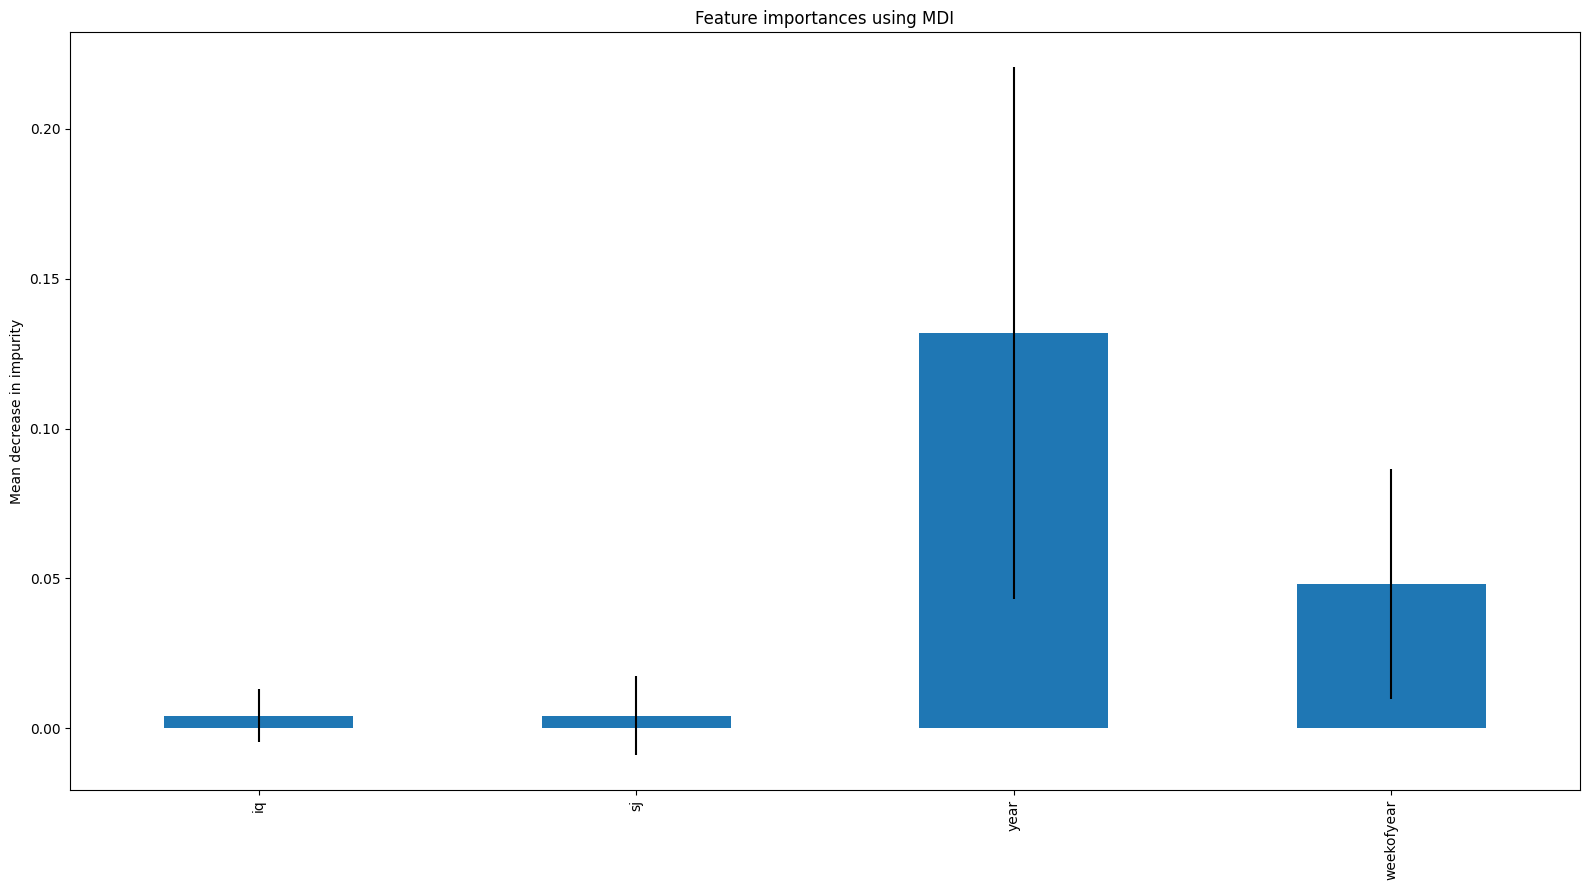

In [121]:
m = 0
n = 4
forest_importances = pd.Series(importances[m:n], index=X_train.columns[m:n])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(yerr=std[m:n], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

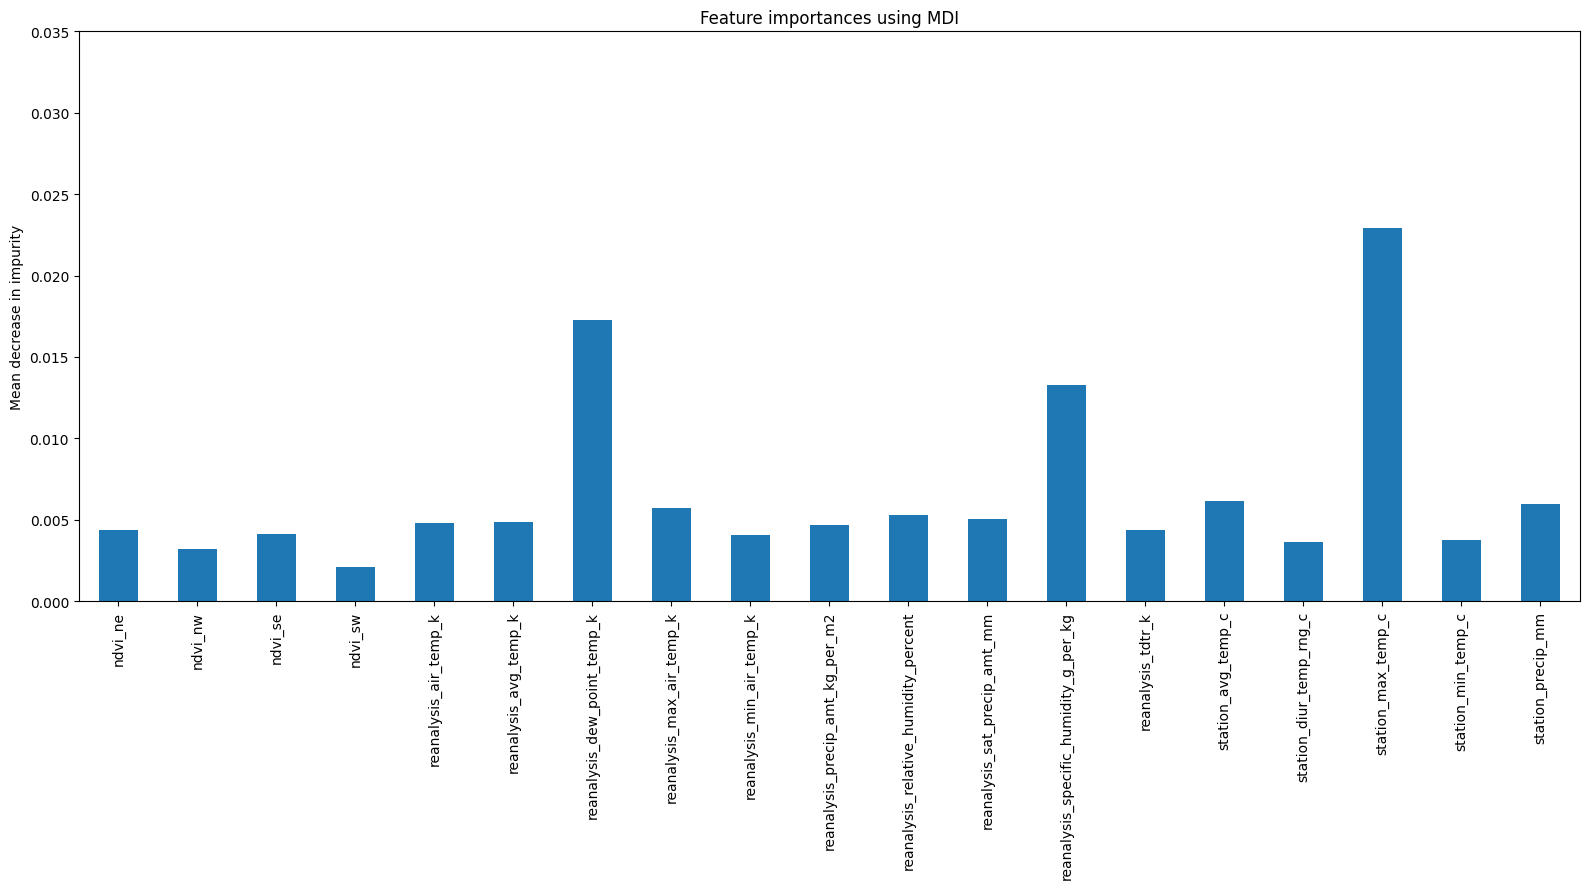

In [145]:
m = 4
n = 23
forest_importances = pd.Series(importances[m:n], index=X_train.columns[m:n])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_ylim([0, 0.035])
fig.tight_layout()

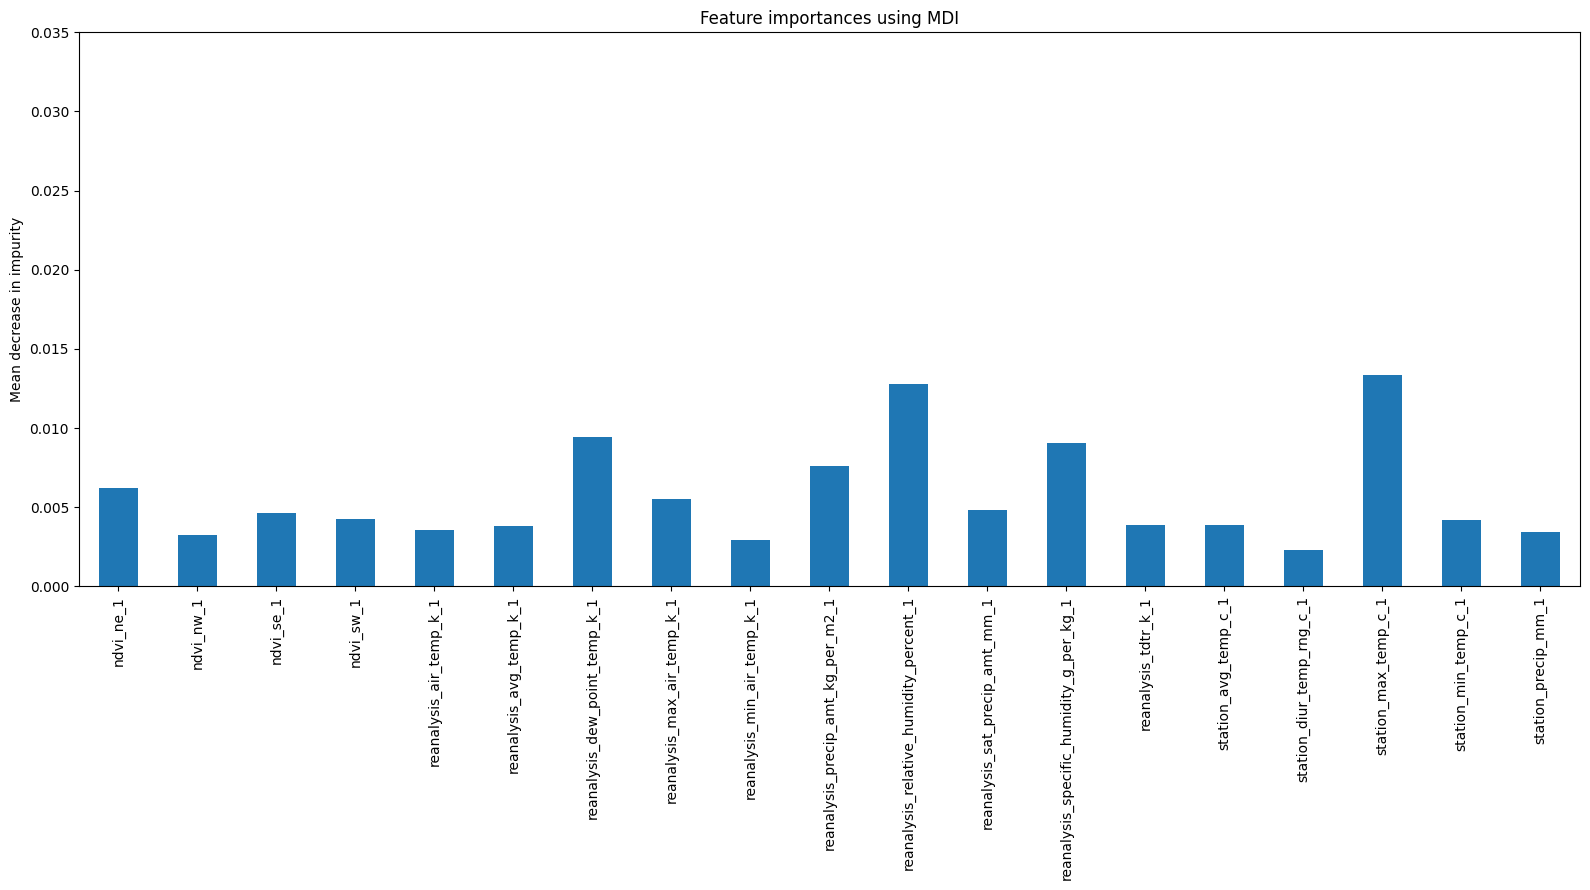

In [144]:
m = 23
n = 42
forest_importances = pd.Series(importances[m:n], index=X_train.columns[m:n])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_ylim([0, 0.035])
fig.tight_layout()

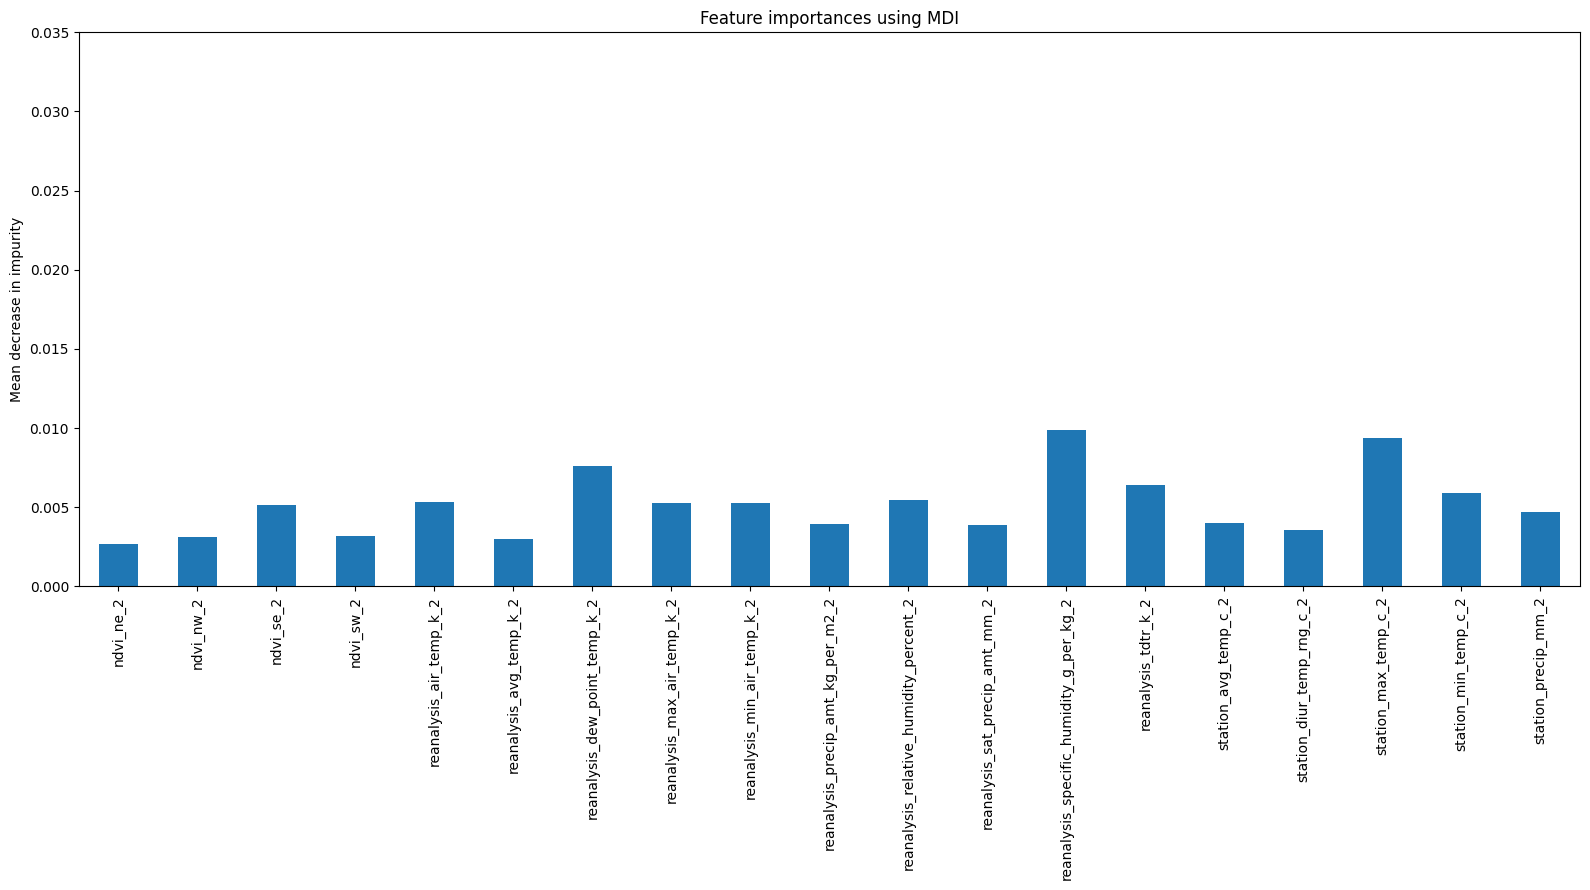

In [143]:
m = 42
n = 61
forest_importances = pd.Series(importances[m:n], index=X_train.columns[m:n])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_ylim([0, 0.035])
fig.tight_layout()

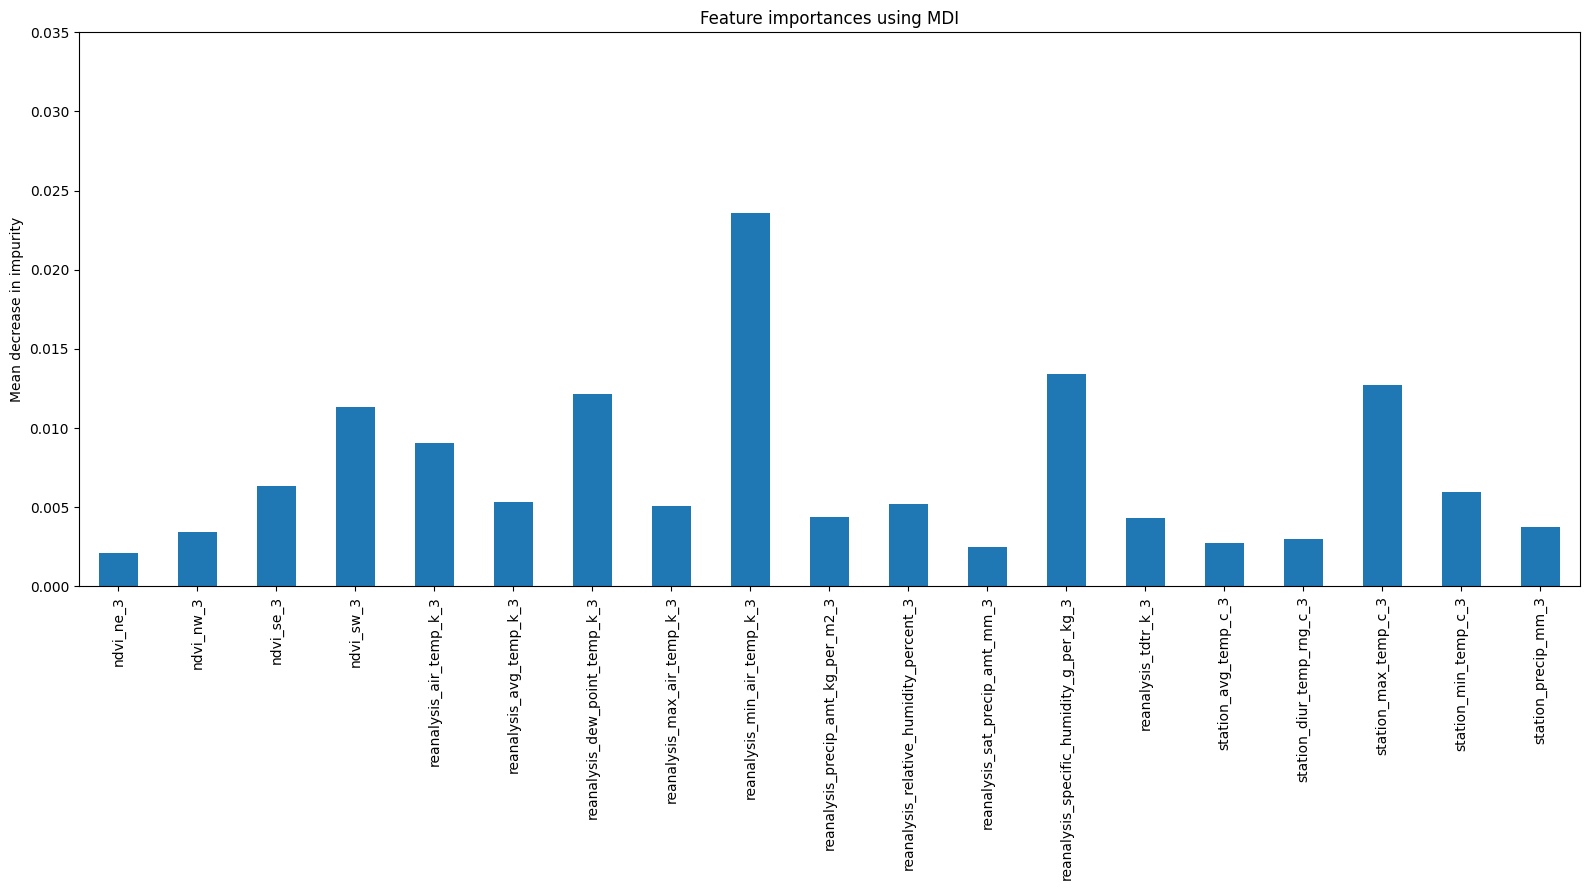

In [142]:
m = 61
n = 80
forest_importances = pd.Series(importances[m:n], index=X_train.columns[m:n])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_ylim([0, 0.035])
fig.tight_layout()

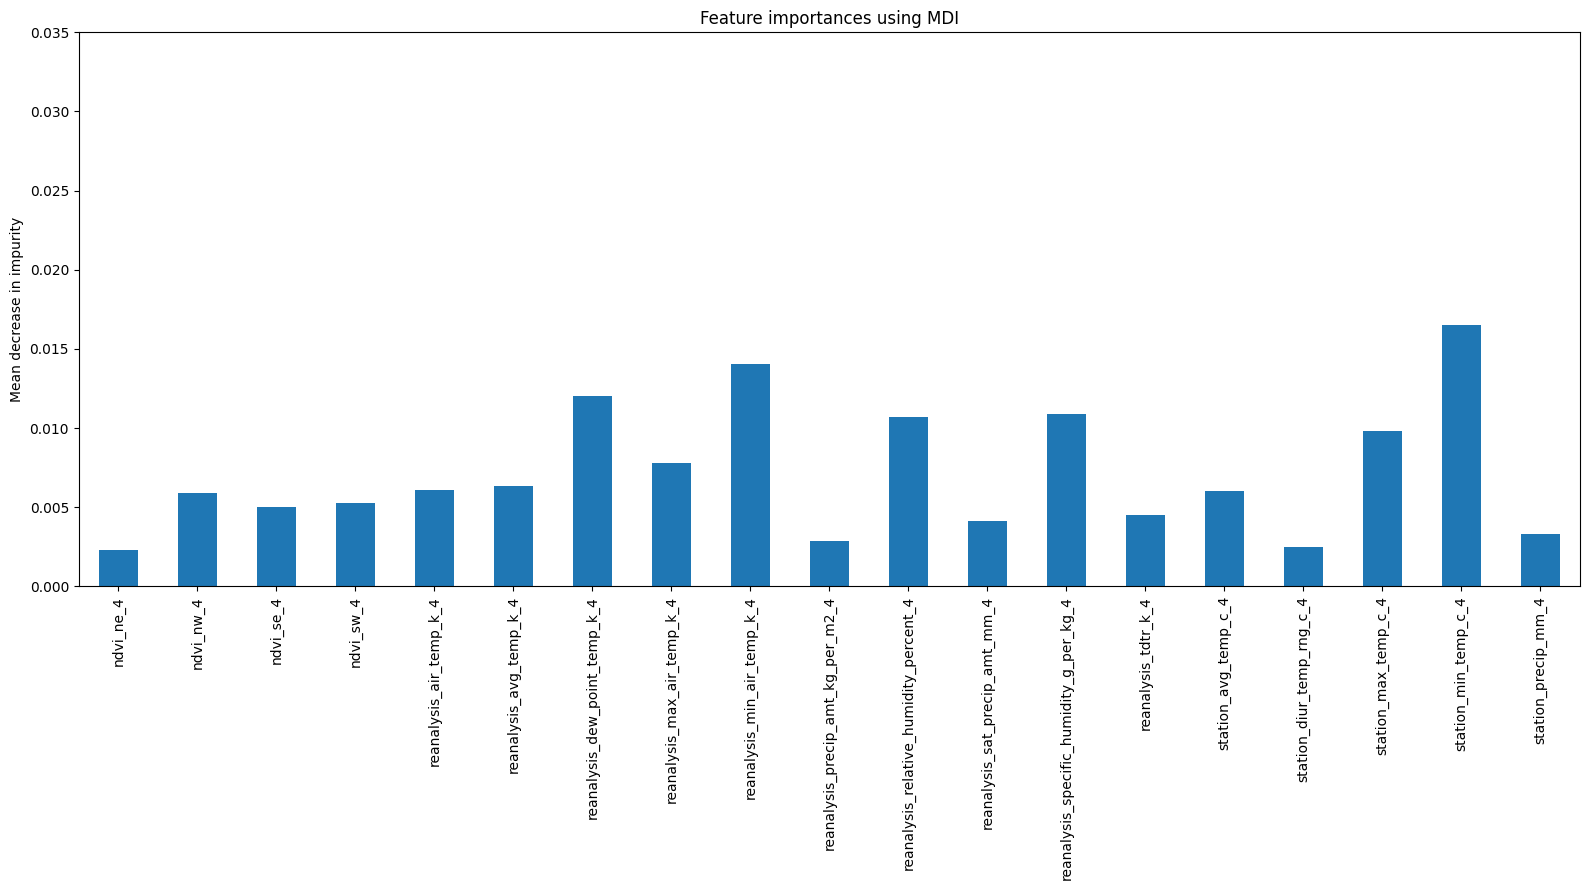

In [141]:
m = 80
n = 99
forest_importances = pd.Series(importances[m:n], index=X_train.columns[m:n])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_ylim([0, 0.035])
fig.tight_layout()

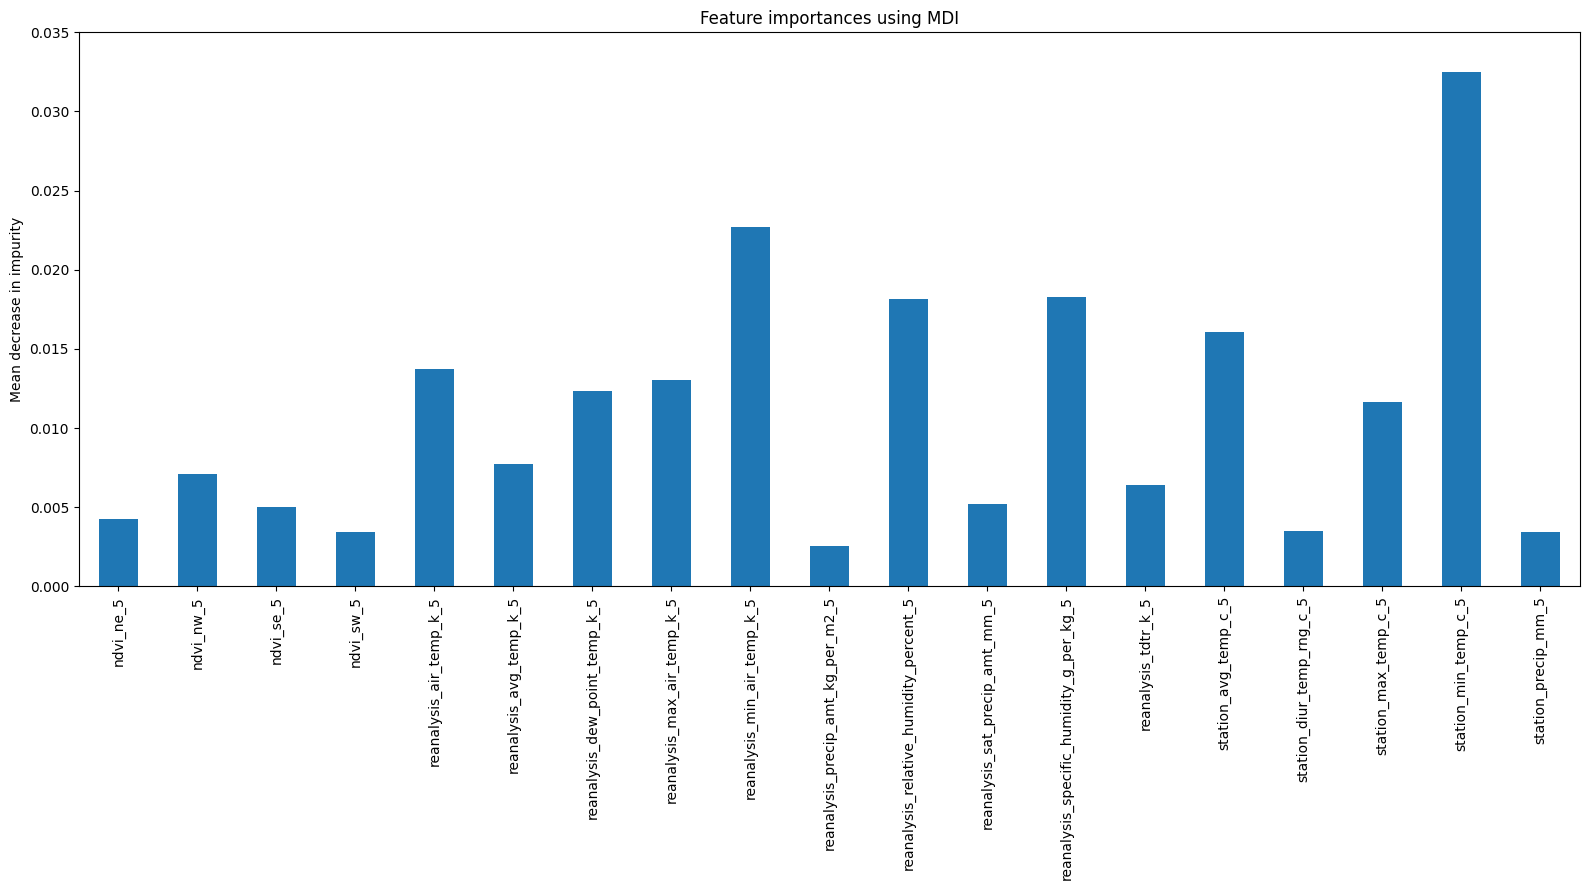

In [140]:
m = 99
n = 118
forest_importances = pd.Series(importances[m:n], index=X_train.columns[m:n])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_ylim([0, 0.035])
fig.tight_layout()